## RNN Recurrent Neural Network
卷曲神经网络
- Embedding 与变长输入的处理
- 序列式问题
- 循环神经网络
- LSTM模型,拥有更好的记忆能力

长短期记忆（Long short-term memory, LSTM）是一种特殊的RNN，主要是为了解决长序列训练过程中的梯度消失和梯度爆炸问题。简单来说，就是相比普通的RNN，LSTM能够在更长的序列中有更好的表现。


In [52]:
import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

from tensorflow import keras


print(sys.version_info)
for module in tf, mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)



sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
tensorflow 2.1.0
matplotlib 3.2.0
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf


In [53]:
# 使用数据集imdb  
imdb = keras.datasets.imdb
# 设定词表的个数，统计所有的词语并将前一万个保留下来
vocab_size = 10000
# 词表的index从3开始算
index_from =3
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size, index_from=index_from)

In [54]:
print(train_data[0], train_labels[0])
print(train_data.shape, train_labels.shape)
print(len(train_data[0]), len(train_data[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
(25000,) (25000,)
218 189


In [55]:
print(test_data.shape, test_labels.shape)

(25000,) (25000,)


In [56]:
word_index = imdb.get_word_index()
print(len(word_index))
print(word_index)

: 88151, 'gravestones': 88152, 'freshmen': 23366, 'formatted': 34646, 'drooping': 88153, 'zelig': 76033, 'yakusyo': 88154, 'lunceford': 82057, 'editorializing': 88155, 'plywood': 34647, 'banalities': 88156, 'nestor': 30536, 'revitalizes': 64826, 'voguing': 40752, 'sedate': 21666, 'dictum': 51857, 'brasher': 88157, 'york': 779, 'unchallengeable': 88158, 'subtelly': 88159, 'opposition': 8772, 'fetchingly': 88160, "'secrets": 70076, 'appearance\x85': 88161, 'teleflick': 88162, 'viennese': 19481, 'orphanage': 10076, 'movers': 40753, "cameraman's": 27605, "cameraman't": 88163, 'pornoes': 88164, 'embodiments': 51858, 'heorine': 88165, 'fraternity': 16105, "'procedures'": 88166, 'finds': 656, 'caratherisic': 88167, 'munshi': 27606, 'clashing': 20584, "mjh's": 40754, 'lärm': 88168, 'nikah': 76037, 'incandescent': 51859, 'stowing': 51860, 'acrid': 51861, 'eyewitness': 25213, 'maniacally': 24001, 'suspenders': 51863, 'acupat': 57060, 'nominee': 11582, 'toshiro': 23367, "'anita": 51864, 'ciannell

In [57]:
# 将整体的序列向右移三位，如下添加四个自定义的字符
word_index = {k:(v+3) for k,v in word_index.items()}

In [58]:
# padding填充的字符
word_index['<PAD>'] = 0 
# 每个字符开始的字符
word_index['<START>'] = 1
# 不知道的字符设置
word_index['<UNK>'] = 2
# 每个字符结束的字符
word_index['<END>'] = 3

# 将word_index 反转成index：word
reverse_word_index = {v:k for k, v in word_index.items()}

decode_review = lambda test_ids:''.join([reverse_word_index.get(word_id, '<UNK>') for word_id in test_ids])

decode_review(train_data[0])

"<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [59]:
max_length = 500

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, # list of list
    value=word_index['<PAD>'],
    padding='post', # post放在补全的后面，pre放在补全的前面
    maxlen = max_length,
)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, # list of list
    value=word_index['<PAD>'],
    padding='post', # post放在补全的后面，pre放在补全的前面
    maxlen = max_length,
)

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [60]:
# 每个embedding定为长度为16的向量
max_length = 500
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential([
    # 1. define matrix : [vocab_size, embedding_dim]
    # 2. 对于每一个句子：[1,2,3,4..], max_length * embedding_dim
    # 3. batch_size * max_length * embedding_dim
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # batch_size * max_length * embedding_dim -> batch_size * embedding_dim,这一层会消掉max_length维度
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [61]:
# 0.2作为验证集
history = model.fit(train_data, train_labels, epochs=30, batch_size=batch_size, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 90us/sample - loss: 0.6842 - accuracy: 0.6045 - val_loss: 0.6506 - val_accuracy: 0.7462
Epoch 2/30
20000/20000 [==============================] - 1s 69us/sample - loss: 0.5480 - accuracy: 0.8046 - val_loss: 0.4418 - val_accuracy: 0.8454
Epoch 3/30
20000/20000 [==============================] - 1s 67us/sample - loss: 0.3641 - accuracy: 0.8730 - val_loss: 0.3401 - val_accuracy: 0.8734
Epoch 4/30
20000/20000 [==============================] - 1s 69us/sample - loss: 0.2835 - accuracy: 0.8971 - val_loss: 0.3112 - val_accuracy: 0.8772
Epoch 5/30
20000/20000 [==============================] - 1s 68us/sample - loss: 0.2435 - accuracy: 0.9114 - val_loss: 0.2903 - val_accuracy: 0.8880
Epoch 6/30
20000/20000 [==============================] - 1s 71us/sample - loss: 0.2150 - accuracy: 0.9225 - val_loss: 0.2859 - val_accuracy: 0.8900
Epoch 7/30
20000/20000 [==============================] -

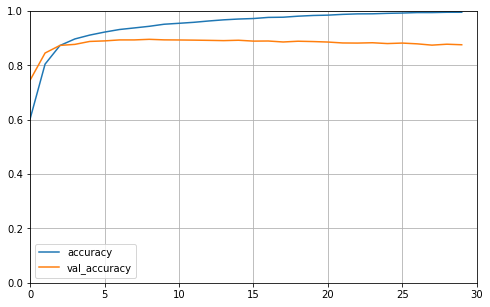

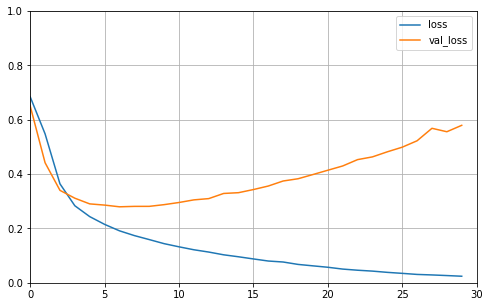

In [62]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

plot_learning_curves(history, 'accuracy', 30, 0, 1)
plot_learning_curves(history, 'loss', 30, 0, 1)

In [63]:
model.evaluate(test_data, test_labels, batch_size=batch_size)

25000/25000 [==============================] - 1s 25us/sample - loss: 0.6392 - accuracy: 0.8561


[0.639247276172638, 0.85612]